In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

mall = pd.read_csv("Mall_Customers.csv")
print(mall.head())
print(mall.info())
print(mall.describe())

#encode Gender (Male=0, Female=1)
mall['Gender'] = mall['Gender'].map({'Male': 0, 'Female': 1})

#features for clustering
X = mall[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

Explained variance ratio: [0.33690046 0.26230645]


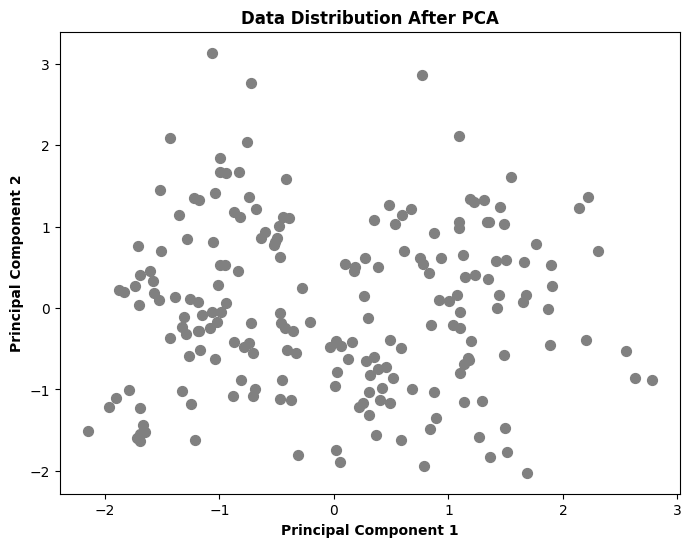

In [5]:
#applying PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', s=50)
plt.title("Data Distribution After PCA", fontweight='bold')
plt.xlabel("Principal Component 1", fontweight='bold')
plt.ylabel("Principal Component 2", fontweight='bold')
plt.show() 

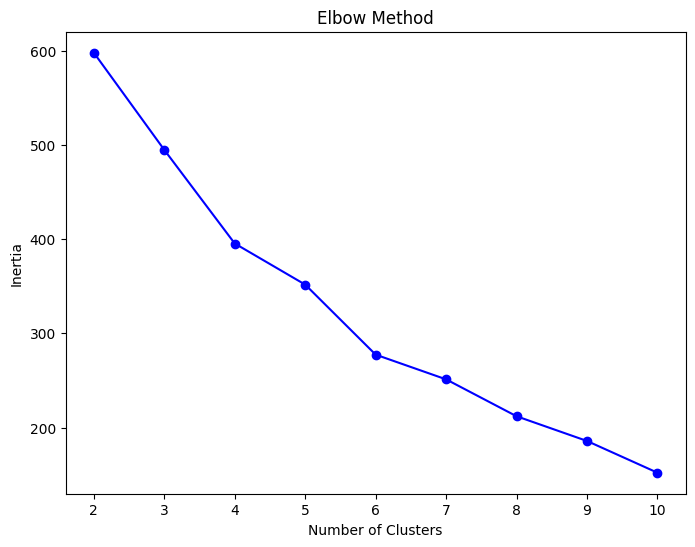

Silhouette Score: 0.27191023466188324


In [6]:
#k-means clustering
#elbow Method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#choosing optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, y_kmeans))


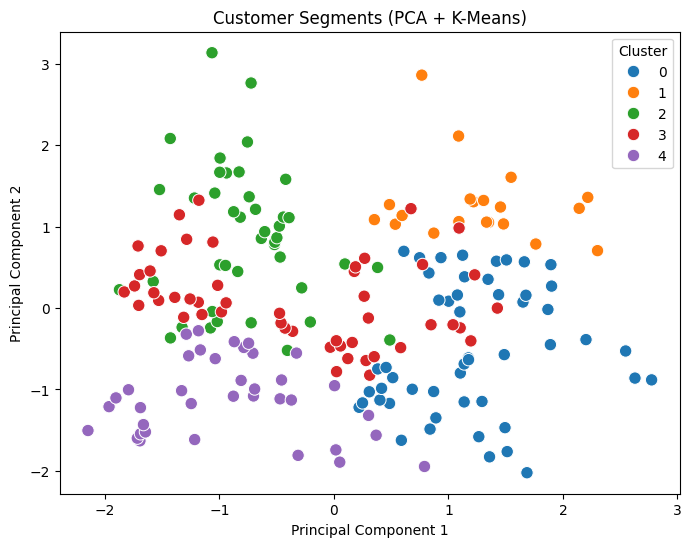

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


In [8]:
#visualising clusters in 2D PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_kmeans, palette='tab10', s=80)
plt.title('Customer Segments (PCA + K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#adding cluster labels to original dataframe
mall['Cluster'] = y_kmeans
print(mall.groupby('Cluster').mean()) 

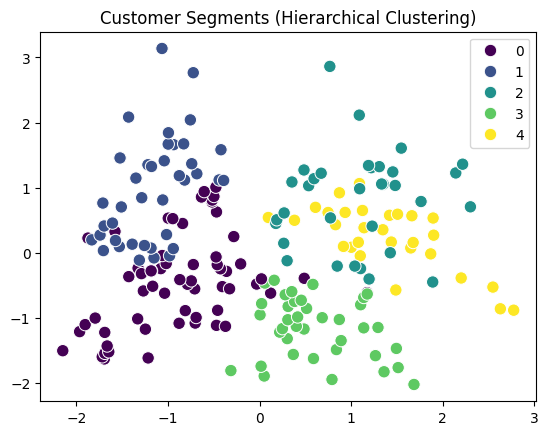

In [9]:
#hierarchiacal clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_hc, palette='viridis', s=80)
plt.title("Customer Segments (Hierarchical Clustering)")
plt.show() 